In [1]:
!gdown 1C0aYI36oCDHSJCY3O69xV2QwycdJ2Rvl

Downloading...
From: https://drive.google.com/uc?id=1C0aYI36oCDHSJCY3O69xV2QwycdJ2Rvl
To: /content/city_seg.zip
100% 211M/211M [00:03<00:00, 62.5MB/s]


In [5]:
!unzip city_seg.zip -d seg_data

Streaming output truncated to the last 5000 lines.
  inflating: seg_data/cityscapes_data/cityscapes_data/train/2754.jpg  
  inflating: seg_data/cityscapes_data/cityscapes_data/train/2755.jpg  
  inflating: seg_data/cityscapes_data/cityscapes_data/train/2756.jpg  
  inflating: seg_data/cityscapes_data/cityscapes_data/train/2757.jpg  
  inflating: seg_data/cityscapes_data/cityscapes_data/train/2758.jpg  
  inflating: seg_data/cityscapes_data/cityscapes_data/train/2759.jpg  
  inflating: seg_data/cityscapes_data/cityscapes_data/train/276.jpg  
  inflating: seg_data/cityscapes_data/cityscapes_data/train/2760.jpg  
  inflating: seg_data/cityscapes_data/cityscapes_data/train/2761.jpg  
  inflating: seg_data/cityscapes_data/cityscapes_data/train/2762.jpg  
  inflating: seg_data/cityscapes_data/cityscapes_data/train/2763.jpg  
  inflating: seg_data/cityscapes_data/cityscapes_data/train/2764.jpg  
  inflating: seg_data/cityscapes_data/cityscapes_data/train/2765.jpg  
  inflating: seg_data/citys

Task: Build the Dataset object that load image and mask separately. The necessary functions are listed below.

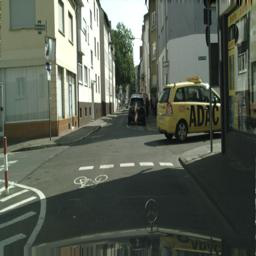

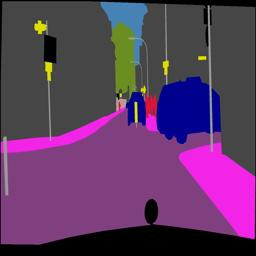

In [7]:
from PIL import Image
img = Image.open('/content/seg_data/cityscapes_data/val/1.jpg')

width, height = img.size

left_box = (0, 0, width // 2, height)
right_box = (width // 2, 0, width, height)

left_half = img.crop(left_box)
right_half = img.crop(right_box)

left_half.show()
right_half.show()

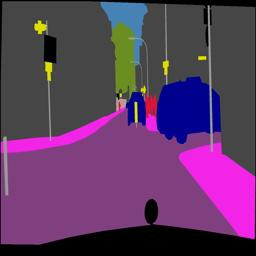

In [8]:
right_half

In [9]:
mapping_20 = { 
        0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 8, 9: 1,
        10: 1, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 3, 18: 3, 19: 3,
        20: 3, 21: 4, 22: 4, 23: 5, 24: 6, 25: 6, 26: 7, 27: 7, 28: 7, 29: 7,
        30: 7, 31: 7, 32: 7, 33: 7, 34: 7
    }

In [10]:
from collections import namedtuple
Label = namedtuple( 'Label' , ['name', 'id', 'trainId', 'category', 'categoryId', 'hasInstances', 'ignoreInEval', 'color'])

labels = [
    #       name                     id    trainId   category            catId     hasInstances   ignoreInEval   color
    Label(  'unlabeled'            ,  0 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'ego vehicle'          ,  1 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'rectification border' ,  2 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'out of roi'           ,  3 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'static'               ,  4 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'dynamic'              ,  5 ,      255 , 'void'            , 0       , False        , True         , (111, 74,  0) ),
    Label(  'ground'               ,  6 ,      255 , 'void'            , 0       , False        , True         , ( 81,  0, 81) ),
    Label(  'road'                 ,  7 ,        0 , 'ground'          , 1       , False        , False        , (128, 64,128) ),
    Label(  'sidewalk'             ,  8 ,        1 , 'ground'          , 8       , False        , False        , (244, 35,232) ),
    Label(  'parking'              ,  9 ,      255 , 'ground'          , 1       , False        , True         , (250,170,160) ),
    Label(  'rail track'           , 10 ,      255 , 'ground'          , 1       , False        , True         , (230,150,140) ),
    Label(  'building'             , 11 ,        2 , 'construction'    , 2       , False        , False        , ( 70, 70, 70) ),
    Label(  'wall'                 , 12 ,        3 , 'construction'    , 2       , False        , False        , (102,102,156) ),

    Label(  'fence'                , 13 ,        4 , 'construction'    , 2       , False        , False        , (190,153,153) ),
    Label(  'guard rail'           , 14 ,      255 , 'construction'    , 2       , False        , True         , (180,165,180) ),
    Label(  'bridge'               , 15 ,      255 , 'construction'    , 2       , False        , True         , (150,100,100) ),
    Label(  'tunnel'               , 16 ,      255 , 'construction'    , 2       , False        , True         , (150,120, 90) ),
    Label(  'pole'                 , 17 ,        5 , 'object'          , 3       , False        , False        , (153,153,153) ),
    Label(  'polegroup'            , 18 ,      255 , 'object'          , 3       , False        , True         , (153,153,153) ),
    Label(  'traffic light'        , 19 ,        6 , 'object'          , 3       , False        , False        , (250,170, 30) ),
    Label(  'traffic sign'         , 20 ,        7 , 'object'          , 3       , False        , False        , (220,220,  0) ),

    Label(  'vegetation'           , 21 ,        8 , 'nature'          , 4       , False        , False        , (107,142, 35) ),
    Label(  'terrain'              , 22 ,        9 , 'nature'          , 4       , False        , False        , (152,251,152) ),
    Label(  'sky'                  , 23 ,       10 , 'sky'             , 5       , False        , False        , ( 70,130,180) ),
    Label(  'person'               , 24 ,       11 , 'human'           , 6       , True         , False        , (220, 20, 60) ),
    Label(  'rider'                , 25 ,       12 , 'human'           , 6       , True         , False        , (255,  0,  0) ),
    Label(  'car'                  , 26 ,       13 , 'vehicle'         , 7       , True         , False        , (  0,  0,142) ),
    Label(  'truck'                , 27 ,       14 , 'vehicle'         , 7       , True         , False        , (  0,  0, 70) ),
    Label(  'bus'                  , 28 ,       15 , 'vehicle'         , 7       , True         , False        , (  0, 60,100) ),
    Label(  'caravan'              , 29 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0, 90) ),
    Label(  'trailer'              , 30 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0,110) ),
    Label(  'train'                , 31 ,       16 , 'vehicle'         , 7       , True         , False        , (  0, 80,100) ),
    Label(  'motorcycle'           , 32 ,       17 , 'vehicle'         , 7       , True         , False        , (  0,  0,230) ),
    Label(  'bicycle'              , 33 ,       18 , 'vehicle'         , 7       , True         , False        , (119, 11, 32) ),
    Label(  'license plate'        , 34 ,       19 , 'vehicle'         , 7       , False        , True         , (  0,  0,142) ),]


In [11]:
import numpy as np
id2color = { label.id : np.asarray(label.color) for label in labels }

In [12]:
id2color

{0: array([0, 0, 0]),
 1: array([0, 0, 0]),
 2: array([0, 0, 0]),
 3: array([0, 0, 0]),
 4: array([0, 0, 0]),
 5: array([111,  74,   0]),
 6: array([81,  0, 81]),
 7: array([128,  64, 128]),
 8: array([244,  35, 232]),
 9: array([250, 170, 160]),
 10: array([230, 150, 140]),
 11: array([70, 70, 70]),
 12: array([102, 102, 156]),
 13: array([190, 153, 153]),
 14: array([180, 165, 180]),
 15: array([150, 100, 100]),
 16: array([150, 120,  90]),
 17: array([153, 153, 153]),
 18: array([153, 153, 153]),
 19: array([250, 170,  30]),
 20: array([220, 220,   0]),
 21: array([107, 142,  35]),
 22: array([152, 251, 152]),
 23: array([ 70, 130, 180]),
 24: array([220,  20,  60]),
 25: array([255,   0,   0]),
 26: array([  0,   0, 142]),
 27: array([ 0,  0, 70]),
 28: array([  0,  60, 100]),
 29: array([ 0,  0, 90]),
 30: array([  0,   0, 110]),
 31: array([  0,  80, 100]),
 32: array([  0,   0, 230]),
 33: array([119,  11,  32]),
 34: array([  0,   0, 142])}

In [13]:
def find_closest_labels_vectorized(mask, mapping): # 'mapping' is a RGB color tuple to categorical number dictionary
    
    closest_distance = np.full([mask.shape[0], mask.shape[1]], 10000) 
    closest_category = np.full([mask.shape[0], mask.shape[1]], None)   

    for id, color in mapping.items(): # iterate over every color mapping
        dist = np.sqrt(np.linalg.norm(mask - color.reshape([1,1,-1]), axis=-1))
        is_closer = closest_distance > dist
        closest_distance = np.where(is_closer, dist, closest_distance)
        closest_category = np.where(is_closer, id, closest_category)
    
    return closest_category

In [14]:
import numpy as np
data=find_closest_labels_vectorized(np.array(right_half),id2color)

In [15]:
import torch
from torch.nn.functional import one_hot

In [16]:
np.unique(data)

array([0, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22,
       23, 24, 26, 27, 28, 29, 30, 31, 33], dtype=object)

In [26]:
import os
from torch.utils.data import Dataset
from torchvision.transforms.functional import to_tensor

In [27]:
class CityscapesImagesDataset(Dataset):
  def __init__(self, root):
    self.samples = list(map(lambda path: f'{root}/{path}', os.listdir(root)))

  def __getitem__(self, index):
    path = self.samples[index]
    image = Image.open(path)
    width, height = image.size
    left_box = (0, 0, width // 2, height)
    right_box = (width // 2, 0, width, height)
    input_image = image.crop(left_box)
    seg_mask = image.crop(right_box)
    return input_image, seg_mask

  def __len__(self):
    return len(self.samples)

In [28]:
train_images_dataset = CityscapesImagesDataset('/content/cityscapes_data/train')
img, seg = train_images_dataset[0]

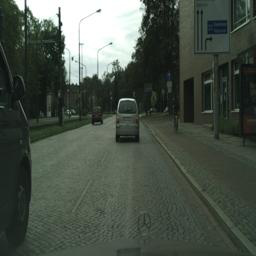

In [29]:
img

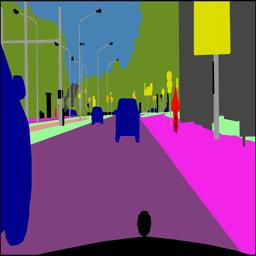

In [30]:
seg

In [31]:
class CityscapesTensorsDataset(Dataset):
  def __init__(self, root):
    self.samples = list(map(lambda path: f'{root}/{path}', os.listdir(root)))

  def __getitem__(self, index):
    path = self.samples[index]
    image = Image.open(path)
    width, height = image.size
    left_box = (0, 0, width // 2, height)
    right_box = (width // 2, 0, width, height)
    input_image = image.crop(left_box)
    seg_mask = image.crop(right_box)
    labels = find_closest_labels_vectorized(np.array(seg_mask), id2color)
    labels = np.array(np.unique(labels), dtype=int)
    encoded_labels = one_hot(torch.from_numpy(labels), 34)
    return to_tensor(input_image), encoded_labels

  def __len__(self):
    return len(self.samples)

In [32]:
train_tensors_dataset = CityscapesTensorsDataset('/content/cityscapes_data/train')
inp_tensor, enc_labels = train_tensors_dataset[0]

In [33]:
inp_tensor

tensor([[[0.1412, 0.1373, 0.1451,  ..., 0.1020, 0.0667, 0.1176],
         [0.1333, 0.1294, 0.1333,  ..., 0.1137, 0.0745, 0.1216],
         [0.1412, 0.1412, 0.1412,  ..., 0.1176, 0.0745, 0.1137],
         ...,
         [0.1176, 0.1216, 0.1216,  ..., 0.2745, 0.2745, 0.2667],
         [0.1176, 0.1176, 0.1216,  ..., 0.2353, 0.2510, 0.2549],
         [0.1176, 0.1176, 0.1176,  ..., 0.1922, 0.2157, 0.2314]],

        [[0.1961, 0.1922, 0.2039,  ..., 0.1294, 0.0863, 0.1373],
         [0.1882, 0.1843, 0.1922,  ..., 0.1412, 0.0941, 0.1412],
         [0.1961, 0.1961, 0.1961,  ..., 0.1451, 0.0941, 0.1333],
         ...,
         [0.1529, 0.1569, 0.1569,  ..., 0.3294, 0.3294, 0.3216],
         [0.1529, 0.1529, 0.1569,  ..., 0.2902, 0.3059, 0.3098],
         [0.1529, 0.1529, 0.1529,  ..., 0.2471, 0.2706, 0.2863]],

        [[0.1294, 0.1255, 0.1294,  ..., 0.0980, 0.0588, 0.1098],
         [0.1216, 0.1176, 0.1176,  ..., 0.1098, 0.0667, 0.1137],
         [0.1373, 0.1294, 0.1294,  ..., 0.1137, 0.0667, 0.

In [34]:
enc_labels

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0,

Task2: Build FFNet UP-A, UP-B and UP-C separately. You need to forward some example data to make sure that the whole pipline works fine.

In [35]:
import math
import torch
from torch import nn
from torch.nn import functional as F

In [36]:
BN_MOMENTUM = 0.1
gpu_up_kwargs = {"mode": "bilinear", "align_corners": True}
mobile_up_kwargs = {"mode": "nearest"}
relu_inplace = True

In [37]:
class ConvBNReLU(nn.Module):
    def __init__(
        self,
        in_chan,
        out_chan,
        ks=3,
        stride=1,
        padding=1,
        activation=nn.ReLU,
        *args,
        **kwargs,
    ):
        super(ConvBNReLU, self).__init__()
        layers = [
            nn.Conv2d(
                in_chan,
                out_chan,
                kernel_size=ks,
                stride=stride,
                padding=padding,
                bias=False,
            ),
            nn.BatchNorm2d(out_chan, momentum=BN_MOMENTUM),
        ]
        if activation:
            layers.append(activation(inplace=relu_inplace))
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)


In [38]:
class AdapterConv(nn.Module):
    def __init__(
        self, in_channels=[256, 512, 1024, 2048], out_channels=[64, 128, 256, 512]
    ):
        super(AdapterConv, self).__init__()
        assert len(in_channels) == len(
            out_channels
        ), "Number of input and output branches should match"
        self.adapter_conv = nn.ModuleList()

        for k in range(len(in_channels)):
            self.adapter_conv.append(
                ConvBNReLU(in_channels[k], out_channels[k], ks=1, stride=1, padding=0),
            )

    def forward(self, x):
        out = []
        for k in range(len(self.adapter_conv)):
            out.append(self.adapter_conv[k](x[k]))
        return out

In [39]:
class UpsampleCat(nn.Module):
    def __init__(self, upsample_kwargs=gpu_up_kwargs):
        super(UpsampleCat, self).__init__()
        self._up_kwargs = upsample_kwargs

    def forward(self, x):
        """Upsample and concatenate feature maps."""
        assert isinstance(x, list) or isinstance(x, tuple)
        # print(self._up_kwargs)
        x0 = x[0]
        _, _, H, W = x0.size()
        for i in range(1, len(x)):
            x0 = torch.cat([x0, F.interpolate(x[i], (H, W), **self._up_kwargs)], dim=1)
        return x0

In [40]:
class UpBranch_Inverted(nn.Module):
    def __init__(
        self,
        in_channels=[64, 128, 256, 512],
        out_channels=[128, 128, 128, 128],
        upsample_kwargs=gpu_up_kwargs,
    ):
        super(UpBranch, self).__init__()

        self._up_kwargs = upsample_kwargs

        self.fam_32_sm = ConvBNReLU(
            in_channels[3], out_channels[3], ks=3, stride=1, padding=1
        )
        self.fam_32_up = ConvBNReLU(
            in_channels[3], in_channels[2], ks=1, stride=1, padding=0
        )
        self.fam_16_sm = ConvBNReLU(
            in_channels[2], out_channels[2], ks=3, stride=1, padding=1
        )
        self.fam_16_up = ConvBNReLU(
            in_channels[2], in_channels[1], ks=1, stride=1, padding=0
        )
        self.fam_8_sm = ConvBNReLU(
            in_channels[1], out_channels[1], ks=3, stride=1, padding=1
        )
        self.fam_8_up = ConvBNReLU(
            in_channels[1], in_channels[0], ks=1, stride=1, padding=0
        )
        self.fam_4 = ConvBNReLU(
            in_channels[0], out_channels[0], ks=3, stride=1, padding=1
        )

        self.high_level_ch = sum(out_channels)
        self.out_channels = out_channels

    def forward(self, x):

        feat4, feat8, feat16, feat32 = x

        smfeat_32 = self.fam_32_sm(feat32)
        upfeat_32 = self.fam_32_up(feat32)

        _, _, H, W = feat16.size()
        x = F.interpolate(upfeat_32, (H, W), **self._up_kwargs) + feat16
        smfeat_16 = self.fam_16_sm(x)
        upfeat_16 = self.fam_16_up(x)

        _, _, H, W = feat8.size()
        x = F.interpolate(upfeat_16, (H, W), **self._up_kwargs) + feat8
        smfeat_8 = self.fam_8_sm(x)
        upfeat_8 = self.fam_8_up(x)

        _, _, H, W = feat4.size()
        smfeat_4 = self.fam_4(
            F.interpolate(upfeat_8, (H, W), **self._up_kwargs) + feat4
        )

        return smfeat_4, smfeat_8, smfeat_16, smfeat_32


In [42]:
class UpBranch(nn.Module):
    def __init__(
        self,
        in_channels=[64, 128, 256, 512],
        out_channels=[128, 128, 128, 128],
        upsample_kwargs=gpu_up_kwargs,
    ):
        super(UpBranch, self).__init__()

        self._up_kwargs = upsample_kwargs

        self.fam_32_sm = ConvBNReLU(
            in_channels[3], out_channels[3], ks=3, stride=1, padding=1
        )
        self.fam_32_up = ConvBNReLU(
            in_channels[3], in_channels[2], ks=1, stride=1, padding=0
        )
        self.fam_16_sm = ConvBNReLU(
            in_channels[2], out_channels[2], ks=3, stride=1, padding=1
        )
        self.fam_16_up = ConvBNReLU(
            in_channels[2], in_channels[1], ks=1, stride=1, padding=0
        )
        self.fam_8_sm = ConvBNReLU(
            in_channels[1], out_channels[1], ks=3, stride=1, padding=1
        )
        self.fam_8_up = ConvBNReLU(
            in_channels[1], in_channels[0], ks=1, stride=1, padding=0
        )
        self.fam_4 = ConvBNReLU(
            in_channels[0], out_channels[0], ks=3, stride=1, padding=1
        )

        self.high_level_ch = sum(out_channels)
        self.out_channels = out_channels

    def forward(self, x):

        feat4, feat8, feat16, feat32 = x

        smfeat_32 = self.fam_32_sm(feat32)
        upfeat_32 = self.fam_32_up(feat32)

        _, _, H, W = feat16.size()
        x = F.interpolate(upfeat_32, (H, W), **self._up_kwargs) + feat16
        smfeat_16 = self.fam_16_sm(x)
        upfeat_16 = self.fam_16_up(x)

        _, _, H, W = feat8.size()
        x = F.interpolate(upfeat_16, (H, W), **self._up_kwargs) + feat8
        smfeat_8 = self.fam_8_sm(x)
        upfeat_8 = self.fam_8_up(x)

        _, _, H, W = feat4.size()
        smfeat_4 = self.fam_4(
            F.interpolate(upfeat_8, (H, W), **self._up_kwargs) + feat4
        )

        return smfeat_4, smfeat_8, smfeat_16, smfeat_32

In [120]:
# Initially built to get a better understanding of how to generalize to B and C
class FNNetUpA(nn.Module):
  def __init__(self):
    super(FNNetUpA, self).__init__()
    self.up = nn.Upsample(scale_factor=2)
    self.upcat = UpsampleCat()

    self.conv1_in = ConvBNReLU(64, 64, ks=1, padding=0)
    self.conv1_out = ConvBNReLU(64, 128, ks=3)

    self.conv2_in = ConvBNReLU(128, 128, ks=1, padding=0)
    self.conv2_to_1 = ConvBNReLU(128, 64, ks=1, padding=0)
    self.conv2_out = ConvBNReLU(128, 128, 3)

    self.conv3_in = ConvBNReLU(256, 256, ks=1, padding=0)
    self.conv3_to_2 = ConvBNReLU(256, 128, ks=1, padding=0)
    self.conv3_out = ConvBNReLU(256, 128, 3)

    self.conv4_in = ConvBNReLU(512, 512, ks=1, padding=0)
    self.conv4_to_3 = ConvBNReLU(512, 256, ks=1, padding=0)
    self.conv4_out = ConvBNReLU(512, 128, 3)

  
  def forward(self, x):
    x1, x2, x3, x4 = x

    x4 = self.conv4_in(x4)
    x4_to_3 = self.conv4_to_3(x4)
    x4_to_3 = self.up(x4_to_3)
    x4 = self.conv4_out(x4)
    
    x3 = self.conv3_in(x3)
    x3 += x4_to_3
    x3_to_2 = self.conv3_to_2(x3)
    x3_to_2 = self.up(x3_to_2)
    x3 = self.conv3_out(x3)
    y = self.upcat([x3, x4])

    x2 = self.conv2_in(x2)
    x2 += x3_to_2
    x2_to_1 = self.conv2_to_1(x2)
    x2_to_1 = self.up(x2_to_1)
    x2 = self.conv2_out(x2)
    y = self.upcat([x2, y])

    x1 = self.conv1_in(x1)
    x1 += x2_to_1
    x1 = self.conv1_out(x1)
    y = self.upcat([x1, y])
    
    return y

In [95]:
class FNNetUp(nn.Module):
  def __init__(self, in_1, out_1, in_2, out_2, in_3, out_3, in_4, out_4):
    super(FNNetUp, self).__init__()
    self.up = nn.Upsample(scale_factor=2)
    self.upcat = UpsampleCat()

    self.conv1_in = ConvBNReLU(in_1, in_1, ks=1, padding=0)
    self.conv1_out = ConvBNReLU(in_1, out_1, ks=3)

    self.conv2_in = ConvBNReLU(in_2, in_2, ks=1, padding=0)
    self.conv2_to_1 = ConvBNReLU(in_2, in_1, ks=1, padding=0)
    self.conv2_out = ConvBNReLU(in_2, out_2, 3)

    self.conv3_in = ConvBNReLU(in_3, in_3, ks=1, padding=0)
    self.conv3_to_2 = ConvBNReLU(in_3, in_2, ks=1, padding=0)
    self.conv3_out = ConvBNReLU(in_3, out_3, 3)

    self.conv4_in = ConvBNReLU(in_4, in_4, ks=1, padding=0)
    self.conv4_to_3 = ConvBNReLU(in_4, in_3, ks=1, padding=0)
    self.conv4_out = ConvBNReLU(in_4, out_4, 3)

  
  def forward(self, x):
    x1, x2, x3, x4 = x

    x4 = self.conv4_in(x4)
    x4_to_3 = self.conv4_to_3(x4)
    x4_to_3 = self.up(x4_to_3)
    x4 = self.conv4_out(x4)
    
    x3 = self.conv3_in(x3)
    x3 += x4_to_3
    x3_to_2 = self.conv3_to_2(x3)
    x3_to_2 = self.up(x3_to_2)
    x3 = self.conv3_out(x3)
    y = self.upcat([x3, x4])

    x2 = self.conv2_in(x2)
    x2 += x3_to_2
    x2_to_1 = self.conv2_to_1(x2)
    x2_to_1 = self.up(x2_to_1)
    x2 = self.conv2_out(x2)
    y = self.upcat([x2, y])

    x1 = self.conv1_in(x1)
    x1 += x2_to_1
    x1 = self.conv1_out(x1)
    y = self.upcat([x1, y])
    
    return y

In [96]:
fnn_up_a = FNNetUpA()

In [97]:
fnn_up_a = FNNetUp(64, 128, 128, 128, 256, 128, 512, 128)
fnn_up_b = FNNetUp(64, 96, 128, 96, 128, 64, 256, 32)
fnn_up_c = FNNetUp(128, 128, 128, 16, 128, 16, 128, 16)

In [117]:
x1 = torch.rand(1, 64, 256, 256)
x2 = torch.rand(1, 128, 128, 128)
x3 = torch.rand(1, 256, 64, 64)
x4 = torch.rand(1, 512, 32, 32)
fnn_up_a([x1, x2, x3, x4]);

In [116]:
x1 = torch.rand(1, 64, 256, 256)
x2 = torch.rand(1, 128, 128, 128)
x3 = torch.rand(1, 128, 64, 64)
x4 = torch.rand(1, 256, 32, 32)
fnn_up_b([x1, x2, x3, x4]);

In [115]:
x1 = torch.rand(1, 128, 256, 256)
x2 = torch.rand(1, 128, 128, 128)
x3 = torch.rand(1, 128, 64, 64)
x4 = torch.rand(1, 128, 32, 32)
fnn_up_c([x1, x2, x3, x4]);

Task: replace convolution units in FFN with InvertedResidual block.

In [105]:
class InvertedResidual(nn.Module):
    def __init__(self, inp, oup, stride, expand_ratio):
        super(InvertedResidual, self).__init__()
        assert stride in [1, 2]

        hidden_dim = round(inp * expand_ratio)
        self.identity = stride == 1 and inp == oup

        if expand_ratio == 1:
            self.conv = nn.Sequential(
                # dw
                nn.Conv2d(hidden_dim, hidden_dim, 3, stride, 1, groups=hidden_dim, bias=False),
                nn.BatchNorm2d(hidden_dim),
                nn.ReLU6(inplace=True),
                # pw-linear
                nn.Conv2d(hidden_dim, oup, 1, 1, 0, bias=False),
                nn.BatchNorm2d(oup),
            )
        else:
            self.conv = nn.Sequential(
                # pw
                nn.Conv2d(inp, hidden_dim, 1, 1, 0, bias=False),
                nn.BatchNorm2d(hidden_dim),
                nn.ReLU6(inplace=True),
                # dw
                nn.Conv2d(hidden_dim, hidden_dim, 3, stride, 1, groups=hidden_dim, bias=False),
                nn.BatchNorm2d(hidden_dim),
                nn.ReLU6(inplace=True),
                # pw-linear
                nn.Conv2d(hidden_dim, oup, 1, 1, 0, bias=False),
                nn.BatchNorm2d(oup),
            )

    def forward(self, x):
        if self.identity:
            return x + self.conv(x)
        else:
            return self.conv(x)

In [110]:
class InvertedResidualFNNetUp(nn.Module):
  def __init__(self, in_1, out_1, in_2, out_2, in_3, out_3, in_4, out_4):
    super(InvertedResidualFNNetUp, self).__init__()
    self.up = nn.Upsample(scale_factor=2)
    self.upcat = UpsampleCat()

    self.conv1_in = InvertedResidual(in_1, in_1, stride=1, expand_ratio=1)
    self.conv1_out = InvertedResidual(in_1, out_1, stride=1, expand_ratio=out_1/in_1)

    self.conv2_in = InvertedResidual(in_2, in_2, stride=1, expand_ratio=1)
    self.conv2_to_1 = InvertedResidual(in_2, in_1, stride=1, expand_ratio=1)
    self.conv2_out = InvertedResidual(in_2, out_2, stride=1, expand_ratio=out_2/in_2)

    self.conv3_in = InvertedResidual(in_3, in_3, stride=1, expand_ratio=1)
    self.conv3_to_2 = InvertedResidual(in_3, in_2, stride=1, expand_ratio=1)
    self.conv3_out = InvertedResidual(in_3, out_3, stride=1, expand_ratio=out_3/in_3)

    self.conv4_in = InvertedResidual(in_4, in_4, stride=1, expand_ratio=1)
    self.conv4_to_3 = InvertedResidual(in_4, in_3, stride=1, expand_ratio=1)
    self.conv4_out = InvertedResidual(in_4, out_4, stride=1, expand_ratio=out_4/in_4)

  
  def forward(self, x):
    x1, x2, x3, x4 = x

    x4 = self.conv4_in(x4)
    x4_to_3 = self.conv4_to_3(x4)
    x4_to_3 = self.up(x4_to_3)
    x4 = self.conv4_out(x4)
    
    x3 = self.conv3_in(x3)
    x3 += x4_to_3
    x3_to_2 = self.conv3_to_2(x3)
    x3_to_2 = self.up(x3_to_2)
    x3 = self.conv3_out(x3)
    y = self.upcat([x3, x4])

    x2 = self.conv2_in(x2)
    x2 += x3_to_2
    x2_to_1 = self.conv2_to_1(x2)
    x2_to_1 = self.up(x2_to_1)
    x2 = self.conv2_out(x2)
    y = self.upcat([x2, y])

    x1 = self.conv1_in(x1)
    x1 += x2_to_1
    x1 = self.conv1_out(x1)
    y = self.upcat([x1, y])
    
    return y

In [112]:
ir_fnn_up_a = InvertedResidualFNNetUp(64, 128, 128, 128, 256, 128, 512, 128)
ir_fnn_up_b = InvertedResidualFNNetUp(64, 96, 128, 96, 128, 64, 256, 32)
ir_fnn_up_c = InvertedResidualFNNetUp(128, 128, 128, 16, 128, 16, 128, 16)

In [114]:
x1 = torch.rand(1, 64, 256, 256)
x2 = torch.rand(1, 128, 128, 128)
x3 = torch.rand(1, 256, 64, 64)
x4 = torch.rand(1, 512, 32, 32)
ir_fnn_up_a([x1, x2, x3, x4]);

In [118]:
x1 = torch.rand(1, 64, 256, 256)
x2 = torch.rand(1, 128, 128, 128)
x3 = torch.rand(1, 128, 64, 64)
x4 = torch.rand(1, 256, 32, 32)
ir_fnn_up_b([x1, x2, x3, x4]);

In [119]:
x1 = torch.rand(1, 128, 256, 256)
x2 = torch.rand(1, 128, 128, 128)
x3 = torch.rand(1, 128, 64, 64)
x4 = torch.rand(1, 128, 32, 32)
ir_fnn_up_c([x1, x2, x3, x4]);